In [117]:
import numpy as np
import pandas as pd
from PIL.ImageChops import difference

data = pd.read_csv('data/KaggleV2-May-2016.csv')
data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [118]:
from sklearn.preprocessing import normalize
data["No-show"] = [[1,0] if x == "No" else [0,1] for x in data["No-show"]]
data["ScheduledDay_Year"] = pd.to_datetime(data["ScheduledDay"]).dt.year
data["ScheduledDay_Month"] = pd.to_datetime(data["ScheduledDay"]).dt.month
data["ScheduledDay_Day"] = pd.to_datetime(data["ScheduledDay"]).dt.day
data["ScheduledDay_Hour"] = pd.to_datetime(data["ScheduledDay"]).dt.hour

data["AppointmentDay_Year"] = pd.to_datetime(data["AppointmentDay"]).dt.year
data["AppointmentDay_Month"] = pd.to_datetime(data["AppointmentDay"]).dt.month
data["AppointmentDay_Day"] = pd.to_datetime(data["AppointmentDay"]).dt.day
data["AppointmentDay_Hour"] = pd.to_datetime(data["AppointmentDay"]).dt.hour

data.drop("ScheduledDay", axis=1, inplace=True)
data.drop("AppointmentDay", axis=1, inplace=True)



data.drop('PatientId',axis = 1,inplace=True)
data.drop('AppointmentID',axis = 1,inplace=True)
data.drop('Neighbourhood',axis = 1,inplace=True)
data["Gender"] = [0 if x == "F" else 1 for x in data["Gender"]]
data["No-show"] = data["No-show"].replace({'yes': 1, 'no': 0}).apply(lambda x: x[0] if len(x) > 0 else None)

data

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDay_Year,ScheduledDay_Month,ScheduledDay_Day,ScheduledDay_Hour,AppointmentDay_Year,AppointmentDay_Month,AppointmentDay_Day,AppointmentDay_Hour
0,0,62,0,1,0,0,0,0,1,2016,4,29,18,2016,4,29,0
1,1,56,0,0,0,0,0,0,1,2016,4,29,16,2016,4,29,0
2,0,62,0,0,0,0,0,0,1,2016,4,29,16,2016,4,29,0
3,0,8,0,0,0,0,0,0,1,2016,4,29,17,2016,4,29,0
4,0,56,0,1,1,0,0,0,1,2016,4,29,16,2016,4,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,0,56,0,0,0,0,0,1,1,2016,5,3,9,2016,6,7,0
110523,0,51,0,0,0,0,0,1,1,2016,5,3,7,2016,6,7,0
110524,0,21,0,0,0,0,0,1,1,2016,4,27,16,2016,6,7,0
110525,0,38,0,0,0,0,0,1,1,2016,4,27,15,2016,6,7,0


In [119]:
c=[]
temp = data["No-show"]
for column in data.columns:
    if column not in ["No-show"]:
        c.append(column)
data =pd.DataFrame(normalize(data.drop("No-show",axis=1), norm='l2'), columns=c)
data["No-show"] = temp
data


,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,ScheduledDay_Year,ScheduledDay_Month,ScheduledDay_Day,ScheduledDay_Hour,AppointmentDay_Year,AppointmentDay_Month,AppointmentDay_Day,AppointmentDay_Hour,No-show
0,0.000000,0.021738,0.0,0.000351,0.000000,0.0,0.0,0.000000,0.706851,0.001402,0.010168,0.006311,0.706851,0.001402,0.010168,0.0,1
1,0.000351,0.019636,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.706885,0.001403,0.010168,0.005610,0.706885,0.001403,0.010168,0.0,1
2,0.000000,0.021739,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.706854,0.001402,0.010168,0.005610,0.706854,0.001402,0.010168,0.0,1
3,0.000000,0.002806,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.707017,0.001403,0.010170,0.005962,0.707017,0.001403,0.010170,0.0,1
4,0.000000,0.019636,0.0,0.000351,0.000351,0.0,0.0,0.000000,0.706885,0.001403,0.010168,0.005610,0.706885,0.001403,0.010168,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,0.000000,0.019638,0.0,0.000000,0.000000,0.0,0.0,0.000351,0.706962,0.001753,0.001052,0.003156,0.706962,0.002104,0.002455,0.0,1
110523,0.000000,0.017885,0.0,0.000000,0.000000,0.0,0.0,0.000351,0.706986,0.001753,0.001052,0.002455,0.706986,0.002104,0.002455,0.0,1
110524,0.000000,0.007365,0.0,0.000000,0.000000,0.0,0.0,0.000351,0.707040,0.001403,0.009469,0.005611,0.707040,0.002104,0.002455,0.0,1
110525,0.000000,0.013326,0.0,0.000000,0.000000,0.0,0.0,0.000351,0.706998,0.001403,0.009469,0.005260,0.706998,0.002104,0.002455,0.0,1


In [120]:
from sklearn.model_selection import train_test_split
training_data,testing_data = train_test_split(data, test_size = 0.8, random_state = 42)

In [121]:
import numpy as np
import time

# Optimized sigmoid functions
def _positive_sigmoid(x):
    return 1 / (1 + np.exp(-x))

def _negative_sigmoid(x):
    exp = np.exp(x)
    return exp / (exp + 1)
#taken from stackoverflow
def sigmoid(x):
    positive = x >= 0
    negative = ~positive
    result = np.empty_like(x, dtype=np.float32)
    result[positive] = _positive_sigmoid(x[positive])
    result[negative] = _negative_sigmoid(x[negative])
    return result

def sigmoid_derivative(x):
    sig = sigmoid(x)
    return sig * (1 - sig)

class NeuralLayer:
    def __init__(self, input_size, output_size):
        self.weights = np.random.randn(input_size, output_size) * 0.01
        self.bias = np.zeros((1, output_size))
    #returned both activation and pre-activation in tuple to reduce computation
    def forward(self, X):
        self.output_1 = np.dot(X, self.weights) + self.bias
        self.output_2 = sigmoid(self.output_1)
        return self.output_2, self.output_1

class NeuralNetwork:
    def __init__(self, input_size, layers_size, output_size):
        self.input_size = input_size
        self.layers_size = layers_size
        self.output_size = output_size

        # Create layers
        self.layers = []
        self.layers.append(NeuralLayer(input_size, layers_size[0]))

        # Hidden layers
        for i in range(len(layers_size)-1):
            self.layers.append(NeuralLayer(layers_size[i], layers_size[i+1]))

        # Output layer
        self.layers.append(NeuralLayer(layers_size[-1], output_size))

    def cross_entropy_loss(self, y_true, y_pred, eps=1e-15):
        y_pred = np.clip(y_pred, eps, 1 - eps)
        return -np.mean(y_true*np.log(y_pred)+(1 - y_true)*np.log(1 - y_pred))
    #train function cleaned and refactored using AI
    def train(self, X, Y, epochs=100, learning_rate=0.1):
        X = np.array(X)
        Y = np.array(Y).reshape(-1, 1)

        for epoch in range(epochs):
            activations = [X]
            pre_activations = []

            # Forward pass
            A = X
            for layer in self.layers:
                A, Z = layer.forward(A)
                activations.append(A)  # Store layer output
                pre_activations.append(Z)  # Store pre-activation

            # Backward pass
            m = X.shape[0]
            dZ_list = []
            dW_list = []
            db_list = []


            dZ = (activations[-1] - Y) / m
            dZ_list.append(dZ)

            for l in range(len(self.layers)-1, -1, -1):
                A_prev = activations[l]

                dW = np.dot(A_prev.T, dZ_list[-1])
                db = np.sum(dZ_list[-1], axis=0, keepdims=True)

                dW_list.append(dW)
                db_list.append(db)
                if l > 0:
                    dA_prev = np.dot(dZ_list[-1], self.layers[l].weights.T)
                    dZ_prev = dA_prev * sigmoid_derivative(pre_activations[l-1])
                    dZ_list.append(dZ_prev)
            dW_list.reverse()
            db_list.reverse()

            for l in range(len(self.layers)):
                self.layers[l].weights -= learning_rate * dW_list[l]
                self.layers[l].bias -= learning_rate * db_list[l]

            if epoch % 10 == 0:
                loss = self.cross_entropy_loss(Y, activations[-1])
                print(f"Epoch {epoch}, Loss: {loss:.4f}")
    def predict(self, X):
        for layer in self.layers:
            X = layer.forward(X)[0]
        self.y_pred = X
        return (self.y_pred)
nn = NeuralNetwork(input_size=16, layers_size=[30,30], output_size=1)
start = time.time()
nn.train(
        training_data.drop("No-show", axis=1),
        training_data["No-show"],
        epochs=100,
        learning_rate=0.1
    )
end = time.time()
print(f"Training took {end - start} seconds")
result = nn.predict(data.drop("No-show", axis=1))
#print(nn.cross_entropy_loss(testing_data["No-show"], result))
result  = np.array((result>0.5).astype(int))
print(np.unique(result))
print(np.unique(testing_data["No-show"]))
acc =np.equal(result.flatten(), data["No-show"]).astype(int).astype(int)
print(np.sum(acc)/result.shape[0]*100)
acc =np.equal(result.flatten(), data["No-show"]).astype(int).astype(int)

print(data["No-show"].shape,result.shape)
#print(confusion_matrix_metrics(data["No-show"], result))

Epoch 0, Loss: 0.6970
Epoch 10, Loss: 0.5144
Epoch 20, Loss: 0.5104
Epoch 30, Loss: 0.5103
Epoch 40, Loss: 0.5103
Epoch 50, Loss: 0.5103
Epoch 60, Loss: 0.5103
Epoch 70, Loss: 0.5103
Epoch 80, Loss: 0.5103
Epoch 90, Loss: 0.5103
Training took 7.339960098266602 seconds
[1]
[0 1]
79.8067440534892
(110527,) (110527, 1)


0.798067440534892
0.8876946687800337


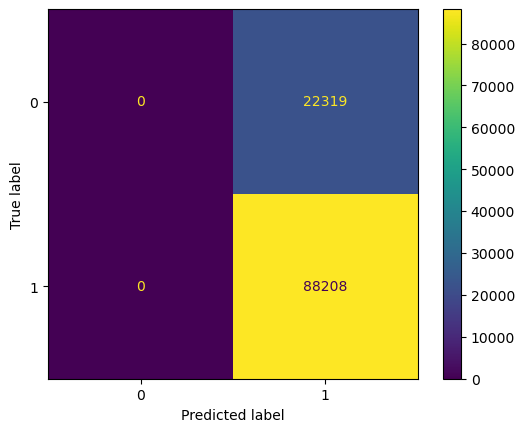

In [122]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score
import sklearn.metrics as metrics

cm = confusion_matrix(data["No-show"], result.flatten())
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
cm_display.plot()
acc = accuracy_score(data["No-show"], result.flatten())
f_1 = metrics.f1_score(data["No-show"], result.flatten())

print(acc)
print(f_1)

torch.Size([22105, 16])
torch.Size([22105])
epoch 0, latest loss 0.5821275115013123
epoch 10, latest loss 0.5120300650596619
epoch 20, latest loss 0.5103400945663452
epoch 30, latest loss 0.5102775692939758
epoch 40, latest loss 0.5102750658988953
epoch 50, latest loss 0.5102749466896057
epoch 60, latest loss 0.5102748870849609
epoch 70, latest loss 0.5102748870849609
epoch 80, latest loss 0.5102750062942505
epoch 90, latest loss 0.5102750062942505
convergence took 0.4653341770172119 seconds
79.8067440534892
0.798067440534892
0.8876946687800337


C:\Users\SEBASTIAN\AppData\Local\Temp\ipykernel_25416\2730168249.py:41: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  result  = np.array((result>0.5))


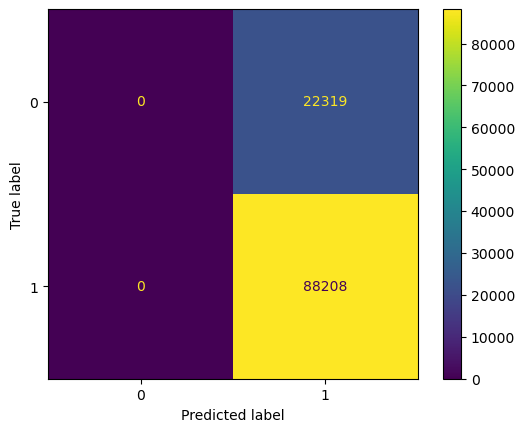

In [123]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
X_data = torch.tensor(data.drop("No-show", axis=1).values.astype(np.float32))
Y_data = torch.tensor(data["No-show"].values.astype(np.float32))
X_testing = torch.tensor(training_data.drop("No-show", axis=1).values.astype(np.float32))
Y_testing = torch.tensor(training_data["No-show"].values.astype(np.float32))
print(X_testing.shape)
print(Y_testing.shape)
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(16,30)
        self.layer_2 = nn.Linear(30,30)
        self.layer_3 = nn.Linear(30,1)

    def forward(self,x):
        x = F.sigmoid(self.layer_3(F.sigmoid(self.layer_2(F.sigmoid(self.layer_1(x))))))
        return x
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = NeuralNetwork().to(device)

criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

epochs = 100
start = time.time()
for epoch in range(epochs):
    output = model(X_testing).flatten()
    loss = criterion(output, Y_testing)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'epoch {epoch}, latest loss {loss}')
end = time.time()

result = model(X_data).flatten()
result  = np.array((result>0.5))
acc =np.equal(result.flatten(), data["No-show"]).astype(int).astype(int)
print(f'convergence took {end - start} seconds')
print(np.sum(acc)/result.shape[0]*100)
cm = confusion_matrix(data["No-show"], result.flatten())
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
cm_display.plot()
acc = accuracy_score(data["No-show"], result.flatten())
f_1 = metrics.f1_score(data["No-show"], result.flatten())
print(acc)
print(f_1)